### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

In questo esercizio utilizzo l'algoritmo di Metropolis. Esso funziona come una sorta di *random walk* i cui passi  effettuati (estratti da una distribuzione di probabilità *T(x'|x)* e poi accettati o rifiutati), sono tali che la distribuzione dei punti visitati tenda asintoticamente alla distribuzione desiderata.  
In particolare, partendo dal punto $x_{n}$, si genera il punto *x'* mediante *T(x'|$x_{n}$)*. Si calcola la quantità $A(x'|x_{n})=min\left\{1, \frac{T(x_{n}|x')p(x')}{T(x'|x_{n})p(x_{n})}\right\}=\alpha$ e si accetta con probabilità $\alpha$ la mossa proposta: si estrae $p\in [0;1]$ e se $p\leq \alpha$ si accetta ($x_{n+1}=x'$), altrimenti si rifiuta.  
Quando la distribuzione di probabilità *T(x'|x)* è simmetrica, la quantità $\alpha$ può essere calcolata come $\alpha=min\left\{1, \frac{p(x')}{p(x_{n})}\right\}$.  
Se si lavora in cartesiane (come nel caso della richiesta dell'esercizio), la proposta della nuova posizione viene eseguita estraendo ciascuna delle tre coordinate *x, y, z* o da una distribuzione uniforme centrata nella posizione attuale e di larghezza $2\delta$, o da una distribuzione normale con centro nella posizione attuale e $\sigma = \delta$. Esiste una regola empirica che suggerisce di regolare *T(x'|x)* e le sue proprietà (nel nostro caso il valore di $\delta$) in modo che vengano accettate circa la metà delle mosse proposte.  

Due aspetti rilevanti del Metropolis sono il fatto che sia in grado di campionare qualsiasi distribuzione di probabilità e che le normalizzazioni presenti nelle distribuzioni si semplifichino nel calcolo della quantità $\alpha$. Perciò è possibile campionare distribuzioni di proababilità di cui non si conosce la normalizzazione o di cui sarebbe piuttosto complesso farne il calcolo.

Il  codice che ho implementato è strutturato nel seguente modo.  
C'è una funzione *Input* che legge da file il valore di $\delta$, $x_{iniziale}$, $y_{iniziale}$, $z_{iniziale}$, numero di step, numero di blocchi, lo stato che si desidera campionare (1S o 2P), e una flag che indica se la probabilità di transizione T(x'|x) è uniforme o normale. 

Poi ho inserito una funzione *Equilibrazione* che esegue un certo numero di step dell'algoritmo e regola la quantità $\delta$ in modo che l'accettanza

($\frac{numero\;di\;mosse\;accettate}{numero\;di\;mosse\;proposte}$) sia circa $\frac{1}{2}$. In particolare ho scelto di considerare l'equilibrazione terminata quando l'accettanza è compresa tra 0.48 e 0.52. 
A questo punto inizia il vero e proprio campionamento, con cicli che avvengono sui blocchi. Con la funzione *Passo* eseguo un passo dell'algoritmo. Successivamente accumulo la posizione $r=\sqrt{x^2+y^2+z^2}$ attuale e calcolo e stampo su file di output la media del blocco e la sua incertezza statistica, per poi rimettere a zero l'accumulatore *r* prima di ricominciare con il blocco successivo.

Ho realizzato i grafici della quantità $\langle r \rangle$ in unità del raggio di Bhor $a_{0}$ nel caso dello stato 1S e nel caso del 2P e ho indicato in rosso nel grafico i valori di aspettazione calcolati in modo esatto (sempre in unità del raggio di Bhor, $\frac{3}{2}$ per l'1S e 5 per il 2P).  

Si riportano di seguito i risultati ottenuti partendo dall'origine e facendo $10^6$ steps divisi in 1000 blocchi, con distribuzione *T(x'|x)* uniforme.

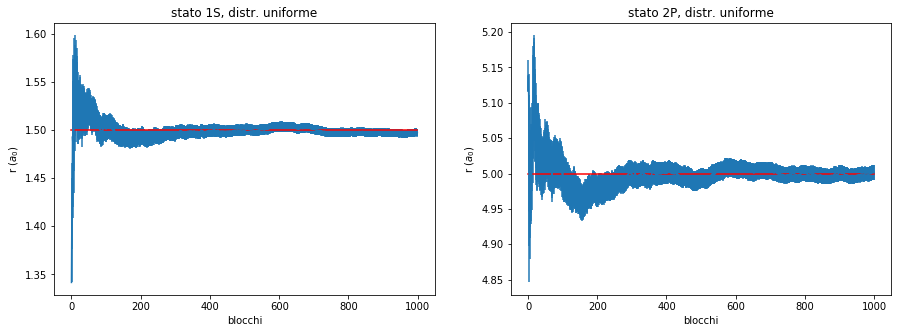

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
b, r, error = np.loadtxt("./es05/uniforme/rmedio_1S.txt", usecols=(0,1,2), unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 1.5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 1S, distr. uniforme')

plt.subplot(1,2,2)
b, r, error = np.loadtxt("./es05/uniforme/rmedio_2P.txt", usecols=(0,1,2), unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 2P, distr. uniforme')

plt.show()

I risultati sono compatibili con quelli attesi.

Si può inoltre visualizzare come i punti campionati si distribuiscono nello spazio 3D:

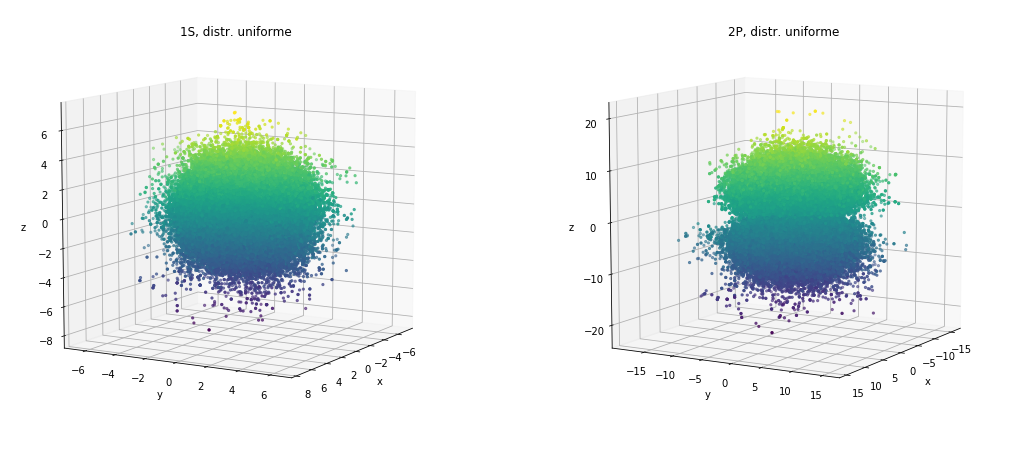

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,8))

X, Y, Z = np.loadtxt("./es05/uniforme/grafico3D1S.dat", usecols=(0,1,2),unpack=True)

ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('1S, distr. uniforme')
ax.view_init(10, 30)


X, Y, Z = np.loadtxt("./es05/uniforme/grafico3D2P.dat", usecols=(0,1,2), unpack=True)
ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('2P, distr. uniforme')
ax.view_init(10, 30)

plt.show()

Provando a partire da un punto lontano dall'origine (per esempio, (100;100;100)) non osservo grosse differenze (la quantità $\delta$ viene sempre modificata circa 20 volte prima che termini l'equilibrazione). Questo è probabilmente dovuto al fatto che terminata la fase di equilibrazione, il campionamente parte dal punto in cui quest'ultima era terminata e non dal punto letto da file di input. Così facendo di fatto dimentico tutti i punti campionati durante l'equilibrazione. 
Riporto qui sotto i grafici di $\langle r \rangle$ in unità del raggio di Bhor $a_{0}$ nel caso dello stato 1S e nel caso del 2P con posizione inziale (100;100;100) e distribuzione uniforme.

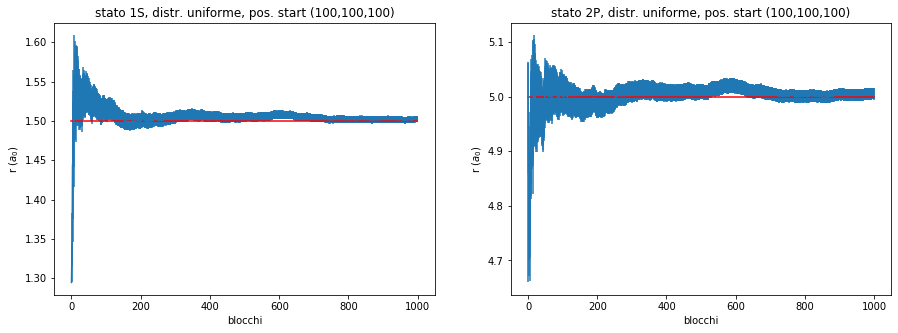

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
b, r, error = np.loadtxt("./es05/100/rmedio_1S.txt", usecols=(0,1,2), unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 1.5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 1S, distr. uniforme, pos. start (100,100,100)')

plt.subplot(1,2,2)
b, r, error = np.loadtxt("./es05/100/rmedio_2P.txt", usecols=(0,1,2), unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 2P, distr. uniforme, pos. start (100,100,100)')

plt.show()

Si riportano di seguito i risultati ottenuti usando come distribuzione *T(x'|x)* una Gaussiana:

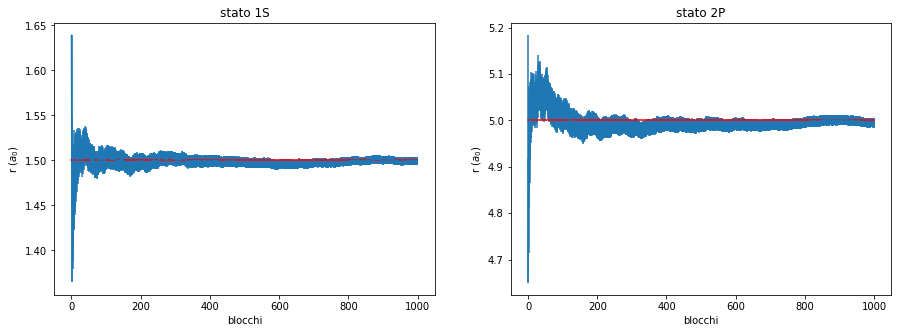

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
b, r, error = np.loadtxt("./es05/normale/rmedio_1S.txt", usecols=(0,1,2), unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 1.5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 1S, distr. normale')

plt.subplot(1,2,2)
b, r, error = np.loadtxt("./es05/normale/rmedio_2P.txt", usecols=(0,1,2), unpack='true')
plt.errorbar(b,r,yerr=error)
g=np.full(b.size, 5)
plt.plot(b,g,c="red")
plt.xlabel('blocchi')
plt.ylabel('r ($a_0$)')
plt.title('stato 2P, distr. normale')

plt.show()

Il comportamento asintotico non cambia variando la distribuzione *T(x'|x)* (infatti $\langle r \rangle$ converge sempre al valore atteso); questa è una conferma del fatto che l'algoritmo di Metropolis funziona usando qualsiasi distribuzione *T(x'|x)*.